In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Load the data
file_ours_path = './/area-ours'
file_sodor_path = './area-sodor'

# Read the files and extract the relevant area data
data_ours_full = pd.read_csv(file_ours_path, header=None)
data_sodor_full = pd.read_csv(file_sodor_path, header=None)

In [3]:
# Extract from sodor
total_line_sodor = data_sodor_full[data_sodor_full[0].str.contains('Total', na=False)].iloc[-1, 0]
areas_sodor = [float(x.strip()) for x in total_line_sodor.split()[-3:-1]]
combinational_area_sodor = areas_sodor[0]
noncombinational_area_sodor = areas_sodor[1]
# extract from ours
total_line_ours = data_ours_full[data_ours_full[0].str.contains('Total', na=False)].iloc[-1, 0]
areas_ours = [float(x.strip()) for x in total_line_ours.split()[-3:-1]]
combinational_area_ours = areas_ours[0]
noncombinational_area_ours = areas_ours[1]
print(f"Combinational area of Sodor: {combinational_area_sodor}")
print(f"Non-combinational area of Sodor: {noncombinational_area_sodor}")
print(f"Combinational area of Ours: {combinational_area_ours}")
print(f"Non-combinational area of Ours: {noncombinational_area_ours}")

Combinational area of Sodor: 585.0517
Non-combinational area of Sodor: 568.0368
Combinational area of Ours: 735.2548
Non-combinational area of Ours: 961.274


In [4]:
# Extract detailed area information from area-ours
detailed_data = data_ours_full[data_ours_full[0].str.contains('Hierarchical cell', na=False)].index[0]
detailed_data_end = data_ours_full[data_ours_full[0].str.contains('Total', na=False)].index[-1]
detailed_rows = data_ours_full.iloc[detailed_data+1:detailed_data_end]
detailed_rows = detailed_rows[detailed_rows[0].str.contains('top', na=False)]

# Initialize counters
ours_combinational_trigger = 0
ours_combinational_fifo = 0 
ours_combinational_other = 0
ours_noncombinational_trigger = 0
ours_noncombinational_fifo = 0
ours_noncombinational_other = 0
# Process each row
for _, row in detailed_rows.iterrows():

    # Split the row into columns and handle potential errors
    cols = [x.strip() for x in row[0].split() if x.strip()]
    if len(cols) >= 6:  # Ensure we have enough columns
        comb_area = float(cols[3])
        noncomb_area = float(cols[4])
        
        if 'trigger' in cols[0]:
            ours_combinational_trigger += comb_area
            ours_noncombinational_trigger += noncomb_area
        elif 'fifo' in cols[0]:
            ours_combinational_fifo += comb_area
            ours_noncombinational_fifo += noncomb_area
        else:
            ours_combinational_other += comb_area
            ours_noncombinational_other += noncomb_area

print(f"Trigger combinational: {ours_combinational_trigger}")
print(f"FIFO combinational: {ours_combinational_fifo}")
print(f"Other combinational: {ours_combinational_other}")
print(f"Total combinational: {ours_combinational_trigger + ours_combinational_fifo + ours_combinational_other}")
print("--------------------------------")
print(f"Trigger non-combinational: {ours_noncombinational_trigger}")
print(f"FIFO non-combinational: {ours_noncombinational_fifo}")
print(f"Other non-combinational: {ours_noncombinational_other}")
print(f"Total non-combinational: {ours_noncombinational_trigger + ours_noncombinational_fifo + ours_noncombinational_other}")


Trigger combinational: 15.2798
FIFO combinational: 168.7929
Other combinational: 551.1822
Total combinational: 735.2548999999999
--------------------------------
Trigger non-combinational: 13.311399999999999
FIFO non-combinational: 371.0027
Other non-combinational: 576.9598
Total non-combinational: 961.2738999999999


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


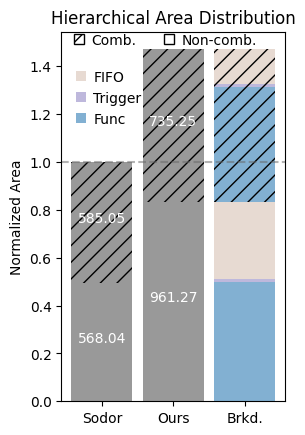

In [5]:
# Plotting the data
fig, ax = plt.subplots()
width = 0.85 # width of the bar
# Bar data
sodor_total = sum([combinational_area_sodor, noncombinational_area_sodor])
sodor_bar = [combinational_area_sodor/sodor_total, noncombinational_area_sodor/sodor_total]
ours_bar = [combinational_area_ours/sodor_total, noncombinational_area_ours/sodor_total]
ours_detailed_bar = [
    ours_combinational_fifo/sodor_total, 
    ours_combinational_trigger/sodor_total, 
    ours_combinational_other/sodor_total,
    ours_noncombinational_fifo/sodor_total, 
    ours_noncombinational_trigger/sodor_total, 
    ours_noncombinational_other/sodor_total,
]

# Professional color scheme
colors = ['#999999', '#E7DAD2', '#BEB8DC', '#82B0D2', '#8ECFC9', '#FFBE7A', '#FA7F6F']
ax.legend(frameon=False)
hatch_comb = '//'
hatch_noncomb = ''

# Plot Sodor
ax.bar(0, sum(sodor_bar), color=colors[0], hatch=hatch_comb, width=width)
ax.bar(0, sodor_bar[1], color=colors[0], hatch=hatch_noncomb, width=width)
# Add data labels for Sodor
ax.text(0, sodor_bar[1]/2, f'{sodor_bar[1]*sodor_total:.2f}', ha='center', color='white')
ax.text(0, sodor_bar[1] + sodor_bar[0]/2, f'{sodor_bar[0]*sodor_total:.2f}', ha='center', color='white')


# Plot Ours
ax.bar(1, sum(ours_bar), color=colors[0], hatch=hatch_comb, width=width)
ax.bar(1, ours_bar[1], color=colors[0], hatch=hatch_noncomb, width=width)
ax.text(1, ours_bar[1]/2, f'{ours_bar[1]*sodor_total:.2f}', ha='center', color='white')
ax.text(1, ours_bar[1] + ours_bar[0]/2, f'{ours_bar[0]*sodor_total:.2f}', ha='center', color='white')

# Plot Ours with breakdown factors
ax.bar(2, ours_detailed_bar[0], color=colors[1], hatch=hatch_comb, bottom=sum(ours_detailed_bar[1:]), width=width)
ax.bar(2, ours_detailed_bar[1], color=colors[2], hatch=hatch_comb, width=width, bottom=sum(ours_detailed_bar[2:]))
ax.bar(2, ours_detailed_bar[2], color=colors[3], hatch=hatch_comb, bottom=sum(ours_detailed_bar[3:]), width=width)
ax.bar(2, ours_detailed_bar[3], color=colors[1], hatch=hatch_noncomb, width=width, bottom=sum(ours_detailed_bar[4:]), label='FIFO')
ax.bar(2, ours_detailed_bar[4], color=colors[2], hatch=hatch_noncomb, bottom=ours_detailed_bar[5], width=width, label='Trigger')
ax.bar(2, ours_detailed_bar[5], color=colors[3], hatch=hatch_noncomb, width=width, label='Func')


# Plot horizontal line at y=1.0
ax.axhline(y=1.0, color='#666666', linestyle='--', alpha=0.5)

# Create two legends
# First legend for the hatching patterns
legend_elements = [
    plt.Rectangle((0,0), 1, 1, facecolor='white', edgecolor='black', hatch='//'),
    plt.Rectangle((0,0), 1, 1, facecolor='white', edgecolor='black', hatch='')
]
legend1 = ax.legend(legend_elements, ['Comb.', 'Non-comb.'], loc='upper left', handlelength=0.75, handletextpad=0.5, frameon=False, ncol=2, bbox_to_anchor=(0.0, 1.03))

# Add the first legend manually
ax.add_artist(legend1)

# Second legend for the detailed breakdown
ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.93), handlelength=0.75, handletextpad=0.5, frameon=False)


# Settings
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Sodor', 'Ours', 'Brkd.'])
ax.set_ylabel('Normalized Area')
ax.set_title('Hierarchical Area Distribution')

fig.subplots_adjust(left=0.1, right=0.45)

plt.show()
#export to pdf
fig.savefig('area-utilization.pdf', bbox_inches='tight')